### Distributions, PDFs/PMFs, CDF and sampling from distributions

Today we are going to explore statistical distributions, create figures of their PDFs and PMFs, calculate the CDFs and write some code to sample from the distributions.

But first, imports...

In [7]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy 

%matplotlib inline

#### Let's start with the binomial distribution

Use LaTeX to write the equation for the PMF in the cell below.  Use the form with _N_ and _p_.  [Here](https://www.sharelatex.com/learn/Mathematical_expressions) is a guide to writing mathematical expressions in LaTeX.

$$E=m$$

\begin{equation}
P(n|N)=\binom{N}{n}p^{n}q^{N-n}=\frac{N!}{n!(N-n)!}p^{n}(1-p)^{N-n}
\end{equation}

\begin{equation}
P(n|N)=\binom{N}{n}p^{n}q^{N-n}=\frac{N!}{n!(N-n)!}p^{n}(1-p)^{N-n}
\end{equation}

#### Create a function that can be used to compute P(x).

Your function will need three arguments.  Hint: look at ``math.factorial`` for computing factorials and ``math.pow`` for exponents.

In [40]:
def binomial_pmf(p, n, k):
    fact = math.factorial(n)/(math.factorial(k)*math.factorial(n-k))
    probability = fact*math.pow(p, k)*math.pow(1-p, n-k)
    
    return probability

In [41]:
math.pow(2, 3)

8.0

In [42]:
binomial_pmf(0.5, 12, 6)

0.2255859375

#### Call your function on the integers from 0 to _N_

Why can't it be bigger than _N_?

Hint: Look at ``np.arange`` for generating linearly spaced integers.  List comprehensions are you friend here.  For loops also work.  A list comprehension is like a compressed for loop.  Use either construct as you prefer, but the list comprehension might look like this:
```
[binomial_P(20, .5, n) for n in np.arange(0, 21)]
```

In [43]:
np.arange(0, 11)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [49]:
[binomial_pmf(0.5, 10, k) for k in np.arange(0, 11)]

[0.0009765625,
 0.009765625,
 0.0439453125,
 0.1171875,
 0.205078125,
 0.24609375,
 0.205078125,
 0.1171875,
 0.0439453125,
 0.009765625,
 0.0009765625]

#### Now, make a figure of _x_ vs _P(x)_

Try to reproduce this figure:
<img src="https://upload.wikimedia.org/wikipedia/commons/7/75/Binomial_distribution_pmf.svg"/>

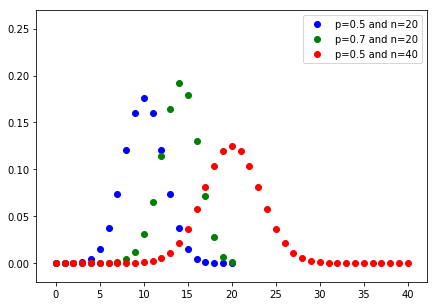

In [54]:

y1 = [binomial_pmf(0.5, 20, k) for k in np.arange(0, 21)]
y2 = [binomial_pmf(0.7, 20, k) for k in np.arange(0, 21)]
y3 = [binomial_pmf(0.5, 40, k) for k in np.arange(0, 41)]

fig = plt.figure(figsize=(7, 5))
ax1 = plt.scatter(np.arange(0, 21), y1, c='b', label='p=0.5 and n=20')
ax2 = plt.scatter(np.arange(0, 21), y2, c='g', label='p=0.7 and n=20')
ax3 = plt.scatter(np.arange(0, 41), y3, c='r', label='p=0.5 and n=40')
plt.legend()
plt.yticks(np.arange(0, 0.26, 0.05))
plt.ylim([-0.02, 0.27])
plt.show()

#### Moving on, do the same thing for the Poisson distribution

Write the LaTeX in the cell below:

#### Create a function for the _P(X)_

Include arguments for $\lambda$ and _k_.

In [55]:
def poisson_p(lamb, k):
    probability = math.pow(lamb, k)*math.exp(-lamb)/math.factorial(k)
    
    return probability

#### Call your function on integers linearly spaced

In [56]:
[poisson_p(1, k) for k in np.arange(0, 21)]

[0.36787944117144233,
 0.36787944117144233,
 0.18393972058572117,
 0.06131324019524039,
 0.015328310048810098,
 0.0030656620097620196,
 0.0005109436682936699,
 7.299195261338141e-05,
 9.123994076672677e-06,
 1.0137771196302974e-06,
 1.0137771196302975e-07,
 9.216155633002704e-09,
 7.68012969416892e-10,
 5.907792072437631e-11,
 4.2198514803125934e-12,
 2.8132343202083955e-13,
 1.7582714501302472e-14,
 1.0342773236060278e-15,
 5.745985131144599e-17,
 3.0242027006024205e-18,
 1.5121013503012103e-19]

#### Make a figure

Try to reproduce this figure:
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/16/Poisson_pmf.svg/650px-Poisson_pmf.svg.png"/>

What is wrong with this figure, BTW?

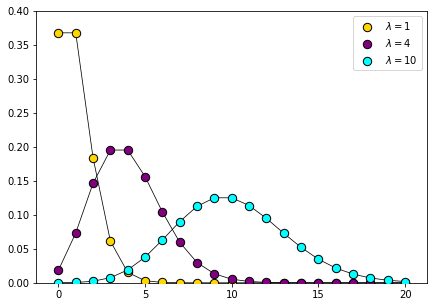

In [12]:
y1 = [poisson_p(1, k) for k in np.arange(0, 21)]
y2 = [poisson_p(4, k) for k in np.arange(0, 21)]
y3 = [poisson_p(10, k) for k in np.arange(0, 21)]

fig = plt.figure(figsize=(7, 5))

ax1 = plt.plot(np.arange(0, 21), y1, c='k', linewidth=0.75, zorder=0)
ax2 = plt.plot(np.arange(0, 21), y2, c='k', linewidth=0.75, zorder=1)
ax3 = plt.plot(np.arange(0, 21), y3, c='k', linewidth=0.75, zorder=2)

ax1 = plt.scatter(np.arange(0, 21), y1, s=70, c='gold', edgecolors='k', label='$\lambda =1$', zorder=3)
ax2 = plt.scatter(np.arange(0, 21), y2, s=70, c='purple', edgecolors='k', label='$\lambda =4$', zorder=4)
ax3 = plt.scatter(np.arange(0, 21), y3, s=70, c='cyan', edgecolors='k', label='$\lambda =10$', zorder=5)

plt.legend()
#plt.yticks(np.arange(0, 0.26, 0.05))
plt.ylim([0, 0.4])
plt.show()

#### Enough with the discrete distributions, let's try a continuous one:  The normal distribution.

Begin by writing the P(x) equation in LaTeX in the cell below.

#### Write a function that implements P(x)

In [17]:

def normal_p(x, mu, sigma):
    coef = math.pow(2*math.pi*math.pow(sigma, 2), -0.5)
    probability = coef*math.exp(-math.pow(x-mu, 2)/(2*math.pow(sigma, 2)))
    return probability

In [18]:
normal_p(5, 0, 1)

1.4867195147342977e-06

#### Call your function on a list of numbers

Hint: look at ``np.linspace``.

In [19]:
np.linspace(-10, 10, 20)

array([-10.        ,  -8.94736842,  -7.89473684,  -6.84210526,
        -5.78947368,  -4.73684211,  -3.68421053,  -2.63157895,
        -1.57894737,  -0.52631579,   0.52631579,   1.57894737,
         2.63157895,   3.68421053,   4.73684211,   5.78947368,
         6.84210526,   7.89473684,   8.94736842,  10.        ])

In [20]:
[normal_p(x, 0, 1) for x in np.linspace(-10, 10, 20)]

[7.69459862670642e-23,
 1.6485437289111684e-18,
 1.1662784480831181e-14,
 2.7245281949674377e-11,
 2.101685077170377e-08,
 5.353419200482968e-06,
 0.00045027946514195825,
 0.012506054257598969,
 0.11469533473205255,
 0.34734293966681634,
 0.3473429396668167,
 0.11469533473205289,
 0.012506054257598969,
 0.00045027946514195825,
 5.353419200482986e-06,
 2.1016850771703843e-08,
 2.7245281949674474e-11,
 1.1662784480831181e-14,
 1.648543728911192e-18,
 7.69459862670642e-23]

#### Reproduce this figure:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/700px-Normal_Distribution_PDF.svg.png"/>

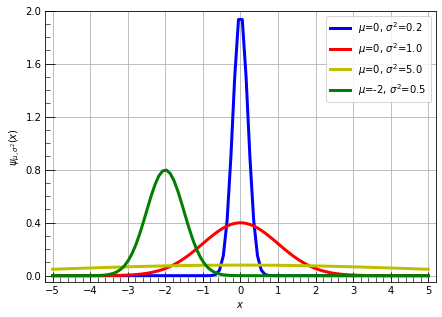

In [21]:
y1 = [normal_p(x, 0, 0.2) for x in np.linspace(-5, 5, 100)]
y2 = [normal_p(x, 0, 1.0) for x in np.linspace(-5, 5, 100)]
y3 = [normal_p(x, 0, 5.0) for x in np.linspace(-5, 5, 100)]
y4 = [normal_p(x, -2, 0.5) for x in np.linspace(-5, 5, 100)]

fig = plt.figure(figsize=(7, 5))

ax1 = plt.plot(np.linspace(-5, 5, 100), y1, c='b', linewidth=3, label='$\mu$=0, $\sigma^{2}$=0.2')
ax2 = plt.plot(np.linspace(-5, 5, 100), y2, c='r', linewidth=3, label='$\mu$=0, $\sigma^{2}$=1.0')
ax3 = plt.plot(np.linspace(-5, 5, 100), y3, c='y', linewidth=3, label='$\mu$=0, $\sigma^{2}$=5.0')
ax4 = plt.plot(np.linspace(-5, 5, 100), y4, c='g', linewidth=3, label='$\mu$=-2, $\sigma^{2}$=0.5')

plt.legend()
plt.yticks(np.linspace(0, 2.0, 6))
plt.ylim([-0.05, 2])
plt.xticks(np.linspace(-5, 5, 11))
plt.xlim([-5.2, 5.2])
plt.xlabel('$x$')
plt.ylabel('$\psi_{\mu,\sigma^{2}}(x)$')
plt.grid(True)
plt.minorticks_on()
plt.tick_params(direction='in', length=10)
plt.tick_params(which='minor', direction='in', length=5)
plt.show()

### OK, now to CDFs

Let's look at the CDF for an emperical distribution.  Recall this from our descriptive statistics notebook.


In [22]:
d1 = np.random.normal(loc=-6.4, scale=1.2, size=40000)
d2 = np.random.normal(loc=4, scale=10, size=16000)
d3 = np.random.normal(loc=22, scale=8, size=72000)
population = np.concatenate([d1, d2, d3])
pop = pd.DataFrame(data=population, columns=['population'])
pop.head()

,population
0,-4.270222
1,-8.553139
2,-7.043959
3,-5.193408
4,-5.935234


#### First, plot a histogram of the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002E00A6F4780>]],
      dtype=object)

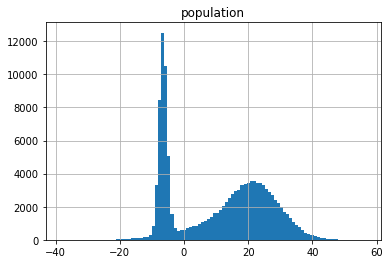

In [23]:
pop.hist(bins=100)

#### Now let's make a function to interpolate our histogram

If you aren't sure what interpolation is, read [this](https://en.wikipedia.org/wiki/Interpolation).

Call your function ``inverse_CDF`` and have it take two arguments:
* ``data`` which is a list of values that are the emperical distribution you want to construct the CDF from
* ``bins`` which is the number of bins to use in the histogram used to interpolate the CDF

The function should use ``np.histogram`` to create data objects (not plots) that contain binned data.  Hint: your call will look something like:
```
    hist_data, bin_edges = np.histogram(data, bins=bins, density=True)
```
Why are we using the ``density=True`` parameter?

Remember that the CDF is the cumulative sum of the probabilty density function.  This means we can create new list with an entry for each bin and use ``np.cumsum`` to sum across a list that is the histogram density * width of a bin.  
Here is what I came up with:
```
    cdf_bins = np.cumsum(hist_data * np.diff(bin_edges))
    cdf_bins = np.insert(cdf_bins, 0, 0)
```
Two questions for you:
* ``np.diff`` computes the bin width.  Why?
* Why do I have the ``np.insert``?




``scipy`` has a nice interpolation family of functions:
```
import scipy.interpolate

inv_cdf = scipy.interpolate.interp1d(cdf_bins, bin_edges)
```
Google that for more information.  Hint: look at the function ``scipy.interpolate.interp1d``.  Make sure you have the order of the arguments `cdf_bins` and `bin_edges` right.  One way gives you the CDF.  The other way gives you the inverse CDF.  Have your function return the CDF and the inverse CDF.  E.g.
```
return [cdf, inv_cdf]
```
Note that the ``scipy.interpolate.interp1d`` interface returns something like a function that you can call and pass it a list of values.  e.g. ``inv_cdf([0.1, 0.2, 0.3])``

#### Use the following cells to build your function

In [24]:
import scipy.interpolate

In [25]:
np.histogram(population, bins=100, density=True)

(array([1.64781023e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.64781023e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        8.23905116e-06, 4.11952558e-05, 8.23905116e-06, 2.47171535e-05,
        2.47171535e-05, 3.29562046e-05, 7.41514605e-05, 9.88686139e-05,
        1.15346716e-04, 1.23585767e-04, 1.97737228e-04, 2.96605842e-04,
        2.30693433e-04, 4.44908763e-04, 6.01450735e-04, 6.75602195e-04,
        8.56861321e-04, 1.07931570e-03, 1.02988140e-03, 1.29353103e-03,
        1.55718067e-03, 2.45523725e-03, 6.88784677e-03, 2.75101918e-02,
        6.95128747e-02, 1.03119964e-01, 8.65265153e-02, 4.15001007e-02,
        1.26222264e-02, 5.84972633e-03, 4.39141427e-03, 5.02582121e-03,
        5.01758216e-03, 5.99802925e-03, 6.18752742e-03, 6.84665152e-03,
        7.06086685e-03, 7.77766430e-03, 8.74987233e-03, 9.47490884e-03,
        1.03400092e-02, 1.14275640e-02, 1.32895895e-02, 1.33966972e-02,
        1.50609855e-02, 1.70713140e-02, 1.90074910e-02, 2.094366

In [27]:
hist_data, bin_edges = np.histogram(population, bins=100, density=True)
cdf_bins = np.cumsum(hist_data * np.diff(bin_edges))
cdf_bins = np.insert(cdf_bins, 0, 0)
cdf_bins

array([0.00000000e+00, 1.56250000e-05, 1.56250000e-05, 1.56250000e-05,
       1.56250000e-05, 3.12500000e-05, 3.12500000e-05, 3.12500000e-05,
       3.12500000e-05, 3.90625000e-05, 7.81250000e-05, 8.59375000e-05,
       1.09375000e-04, 1.32812500e-04, 1.64062500e-04, 2.34375000e-04,
       3.28125000e-04, 4.37500000e-04, 5.54687500e-04, 7.42187500e-04,
       1.02343750e-03, 1.24218750e-03, 1.66406250e-03, 2.23437500e-03,
       2.87500000e-03, 3.68750000e-03, 4.71093750e-03, 5.68750000e-03,
       6.91406250e-03, 8.39062500e-03, 1.07187500e-02, 1.72500000e-02,
       4.33359375e-02, 1.09250000e-01, 2.07031250e-01, 2.89078125e-01,
       3.28429687e-01, 3.40398437e-01, 3.45945312e-01, 3.50109375e-01,
       3.54875000e-01, 3.59632813e-01, 3.65320313e-01, 3.71187500e-01,
       3.77679688e-01, 3.84375000e-01, 3.91750000e-01, 4.00046875e-01,
       4.09031250e-01, 4.18835938e-01, 4.29671875e-01, 4.42273438e-01,
       4.54976563e-01, 4.69257813e-01, 4.85445313e-01, 5.03468750e-01,
      

In [37]:
def inverse_cdf(data, bins=100):
    hist_data, bin_edges = np.histogram(data, bins=100, density=True)
    cdf_bins = np.cumsum(hist_data * np.diff(bin_edges))
    cdf_bins = np.insert(cdf_bins, 0, 0)
    
    inv_cdf = scipy.interpolate.interp1d(cdf_bins, bin_edges)
    cdf = scipy.interpolate.interp1d(bin_edges, cdf_bins)
    
    return [cdf, inv_cdf]

If you did it right, the cell below should use your function to create interpolations of the CDF and the inverse CDF.

In [38]:
[cdf, inv_cdf] = inverse_cdf(population, 100)

In [42]:
x=[1,2,3]
cdf(x)

array([0.36232747, 0.36842044, 0.37497233])

#### Now, plot the CDF using the next two cells

You can modify them if you need too, but they should give you a place to start.

In [40]:
x = np.linspace(np.min(population), np.max(population), num=100)

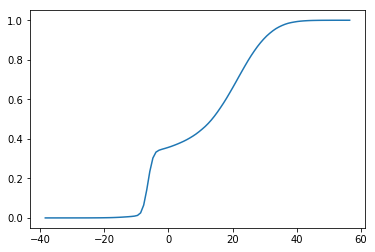

In [33]:
plt.plot(x, cdf(x))

#### Now, plot the inverse CDF using the next two cells

You can modify them if you need too, but they should give you a place to start.

In [98]:
zero2one = np.linspace(0, .9999, num=100)

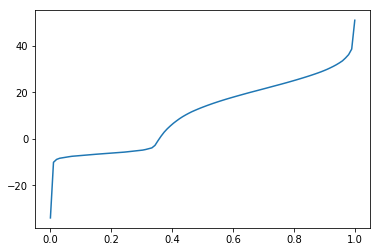

In [68]:
plt.plot(zero2one, inv_cdf(zero2one))

#### Cool!  Now you have taken your empirical distribution, computed a CDF and the inverse CDF.  Now you can sample from your inverse CDF to generate values from our empirical distribution.

Let's do that with ``np.random.rand``.  Why are we using this random function?  What is special about how it works that makes it useful with the inverse CDF?


OK, let's put this together with something like:
```
sample = inv_cdf(np.random.rand(1000))
```

In [35]:
sample = inv_cdf(np.random.rand(1000))

Now make a histogram of sample and set the bins to 100.  How does it look?  What happens if you increase the argument to ``np.random.rand``?

(0, 0.15)

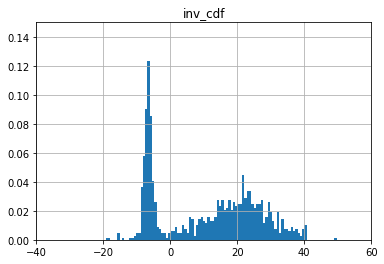

In [36]:
sample = inv_cdf(np.random.rand(1000))
cdf_data = pd.DataFrame(data=sample, columns=['inv_cdf'])
cdf_data.hist(bins=100, density=True)
plt.xlim([-40, 60])
plt.ylim([0, 0.15])

(0, 0.15)

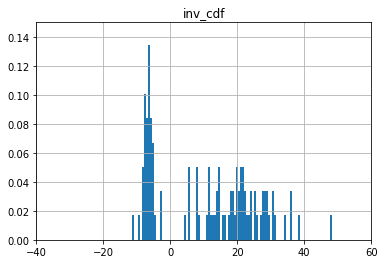

In [71]:
sample = inv_cdf(np.random.rand(100))
cdf_data = pd.DataFrame(data=sample, columns=['inv_cdf'])
cdf_data.hist(bins=100, density=True)
plt.xlim([-40, 60])
plt.ylim([0, 0.15])

(0, 0.15)

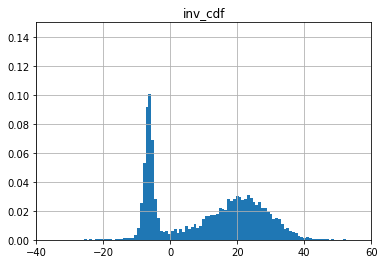

In [72]:
sample = inv_cdf(np.random.rand(10000))
cdf_data = pd.DataFrame(data=sample, columns=['inv_cdf'])
cdf_data.hist(bins=100, density=True)
plt.xlim([-40, 60])
plt.ylim([0, 0.15])

(0, 0.15)

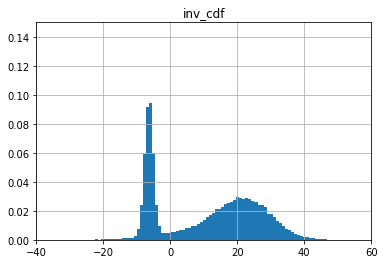

In [73]:
sample = inv_cdf(np.random.rand(100000))
cdf_data = pd.DataFrame(data=sample, columns=['inv_cdf'])
cdf_data.hist(bins=100, density=True)
plt.xlim([-40, 60])
plt.ylim([0, 0.15])

In practice, you will use pre-existing tools for sampling from disitributions that are typical.  To see the complete set available in scipy, look [here](https://docs.scipy.org/doc/scipy/reference/stats.html).

### That's it for today!  